# Objective: This is a simple project. The objective is to study the Tinanic dataset, available at: https://www.kaggle.com/c/titanic

# The big question that people usually want to ask is: <span style="color:red">What factors helped someone survive the sinking? </span>. 

## First, let's take a look at the dataset itself

In [1]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Let's see a preview of the data
titanic_df.head()

# survived=1: the passenger did survive, 0: did NOT survive.
# SibSp: Sibling/Spouse, 1 means true: they do have a sibling on board.
# parch: parents/children
# A lot of cabin info is missing. First letter of cabin is the deck.
# Embarked: S,C,... are letters representing the cities they boarded.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## To get overall info for the dataset:

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Notice that a lot of info about cabin is missing: only 204 rows of cabin has non-nul values. Other fields/features/parameters have almost around 891.

## Here are the questions we'll look at:

** <span style="color:red">    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc).</span>**
    
** <span style="color:red">    2.) What deck were the passengers on and how does that relate to their class?
</span>**

** <span style="color:red">    3.) Where did the passengers come from?
</span>**

** <span style="color:red">    4.) Who was alone and who was with family?
</span>**

** <span style="color:red">    5.) What factors helped someone survive the sinking?
</span>**


** <span style="color:red">    6.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
</span>**

** <span style="color:red">    7.) Did having a family member increase the odds of surviving the crash?
</span>**


# Q1: Who were the passengers on the titanic?

In [3]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## First, check for genders

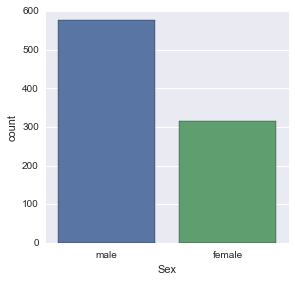

In [4]:
#---For Py2:
#sns.factorplot('Sex',data=titanic_df)

#---For Py3: they change the way factorplot works:
#Because the plots can be drawn horizontally or vertically, you now have to 
#specify kind="count" in factorplot (or use the axes-level countplot function) 
#rather than not passing a quantitative variable.
# Check out: 
# http://stanford.edu/~mwaskom/software/seaborn-dev/generated/seaborn.factorplot.html#seaborn.factorplot
sns.factorplot('Sex',data=titanic_df,kind='count')


#### There are way more male than female, ratio is almost 2:1

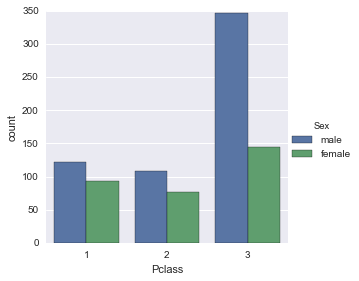

In [5]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')
#so now, Pclass is the outer theme, while 'Sex' in inner theme.

#### Much more of the3rd class are male than female.
#### The 1st and 2nd classes are more or less even, especially given that time period there should be more male of upper class.

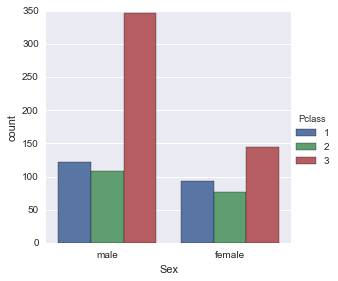

In [6]:
# We can do the opposite too: let 'Sex' be the outer theme, while Pclass is inner.
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

#### But it might be more interesting to see the split between male/female/children because it will become important when we are interested in the survival rate, since "women and children first"

## Let's use the .apply(function) technique to create a new column.

In [7]:
# Assume: anyone as under 16 as a child

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger #so later, you need to pass these 2 para from dataframe
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

#INPUT: GRAB 2 EXISTING COLS OF THE DATAFRAME
#OUTPUT: ADD ANOTHER COL AS A FUNCTION OF THESE 2 INPUT COLS TO THE DATAFRAME.
# We'll define a new column called 'person', 
# need to pass, as a list, 2 cols: 'Age' and 'Sex' to apply function
# and since those are 2 cols, remember to specify axis=1 (axis=0 for index(row))
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

# if you mess this up, to delete the falsely created col, use:
# del titanic_df['person'], or titanic_df = titanic_df.drop('person', 1), here
# 1 means axis=1, i.e. drop a column.
# using drop is preferrable than using del, since with drop you can delete multiple
# col at a time by passing a list, and can choose to do this inplace or not, e.g.
# df.drop(df.columns[[0, 1, 3]], axis=1, inplace=True)

#### preview the first 10 rows to see if our method works

In [8]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


#### Now, let's retry the factor plot with children taken into account.

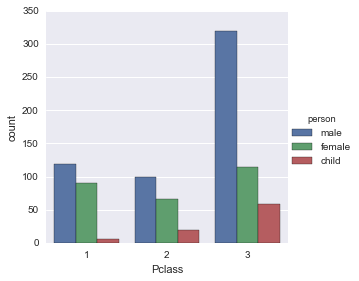

In [9]:
#Again, remember to add kind='count' for Python 3
sns.factorplot('Pclass',data=titanic_df,hue='person', kind='count')

#### So it turns out that there were way more children on the 3rd class than 1st and 2nd classes, which is interesting. We might have thought that for such a luxurious trip, there should have been way more "pampered" children on the 1st class than the 3rd class.

## Second, let's take a look into the ages

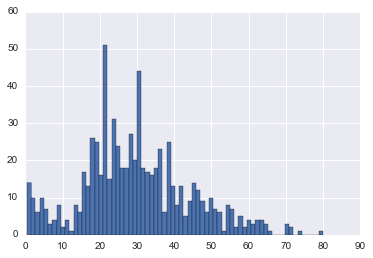

In [10]:
# Quick way to create a histogram using pandas
# Grab the 'Age' col and pass on the .hist() method to it.
titanic_df['Age'].hist(bins=70)

#### So there is a peak of really young children, then it drops down at around age=10, and then the rest is quite "normal" distribution with mean around age=30. Let's go ahead and actually find that mean:

In [11]:
titanic_df['Age'].mean() # so indeed it was around age=30

29.69911764705882

#### We could also get a quick overall comparison of male,female,child

In [12]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### What are the other ways that we can visualize this data?
#### We can use FacetGrid to plot multiple KDE plots on one plot, to visualize the ages and genders

C:\Users\Tho7\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


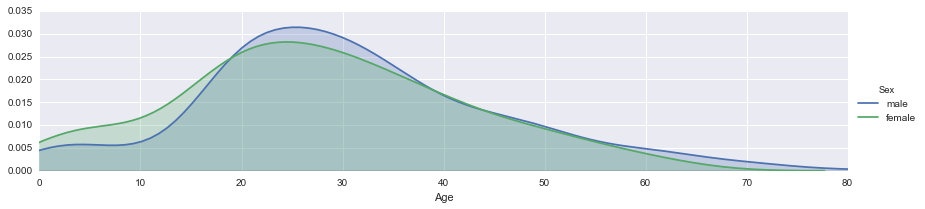

In [14]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, 
# set the hue, and change the aspect ratio to 4.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
# Those KDE plots will use the 'Age' col, so this gives a multiple KDE plot based on 'Age'.
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

#### We can re-do the above considering adding children too: Just copy and paste the above cell and change the hue

C:\Users\Tho7\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


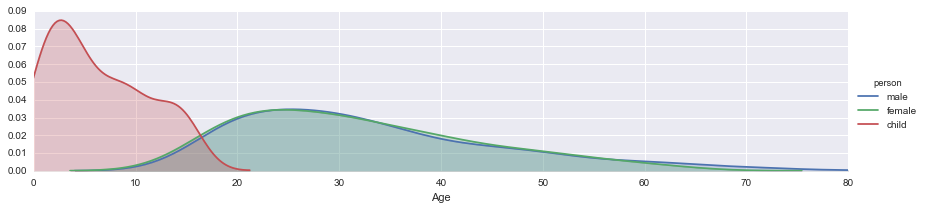

In [15]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
# Those KDE plots will use the 'Age' col, so this gives a multiple KDE plot based on 'Age'.
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

#### Now you can see the distr. for children is cut off, and the distr. for male/female are as before.

## Notice that since the KDE is subject to bandwidth parameter, you still see the cutoff for children getting past the age=16 limit. But in reality, that's just the bandwidth.

#### We now can do the exact same thing for classes, to see how ages are distributed by classes

C:\Users\Tho7\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


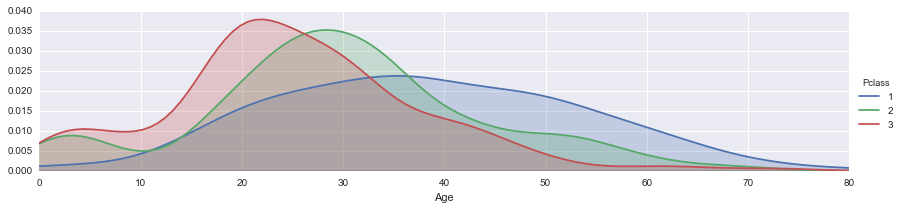

In [16]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
# Those KDE plots will use the 'Age' col, so this gives a multiple KDE plot based on 'Age'.
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

#### Interesting: 1st class has almost normal distr, but the 2nd and 3rd classes skew a bit toward the age=20-30 range. Check back with the mean age of the passengers are around 30.

### So we've got a pretty good picture on who were the passegers based on analysis of ages, genders, classes. Let's move on the answer the 2nd question.

# Q2: What deck were the passengers on and how does that relate to their class?

In [17]:
# Let's get a quick look at our dataset again
titanic_df.head()
#So we can see that the Cabin column has information on the deck, 
# but it has several NaN values, so we'll have to drop them.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [21]:
# Quick preview of the decks
deck.head()
#Notice we only need the first letter of the deck to classify its level 
# (e.g. A,B,C,D,E,F,G)

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [22]:
type(deck)

pandas.core.series.Series

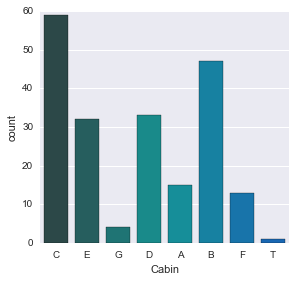

In [23]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:#so remember deck is just the cabin col (which is a series), drop all
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels) # CONVERT A LIST INTO A DF, in order to use factorplot()
cabin_df.columns = ['Cabin'] #name the col, in order to use factorplot() 
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')
# Again, remember to add kind='count' to factorplot() for Python3
# if you seach for "matplotlib + colormap", you will see a range of palette you can use,
# you can make these paletter DARKER by adding _d just like winter_d
# http://matplotlib.org/users/colormaps.html

#### Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code. This is one of the thing to learn in DataScience: never trust your result blindly, always check back, keep asking questions, see the non-sense thing and try to correct those. It's not just a science, it's also an art and you need to be detail-oriented.

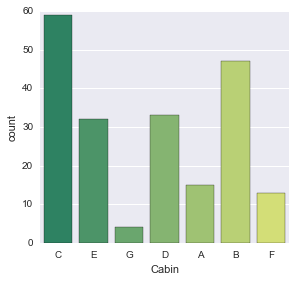

In [24]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

### Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

# Q3: Where did the passengers come from?

In [25]:
# Let's take another look at our original data
titanic_df.head()
# Note here that the Embarked column has C,Q,and S values. 
#Reading about the project on Kaggle you'll note that these stand for 
# Cherbourg, Queenstown, Southhampton.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


C:\Users\Tho7\Anaconda3\lib\site-packages\seaborn\categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


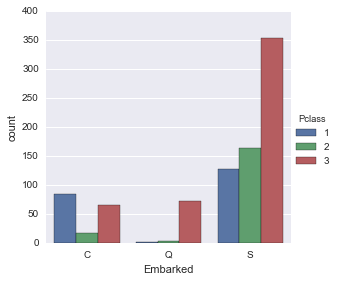

In [26]:
# Now we can make a quick factorplot to check out the results, 
# note the x_order argument, used to deal with NaN values
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',x_order=['C','Q','S'],kind='count')
#set hue='Pclass' to see: who from which class that came on board from which city?
# so that we may check if certain city has a majority of certain class of people.

# C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3304: UserWarning: 
# The `x_order` parameter has been renamed `order` UserWarning)

#### An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.
#### Also check the economy of Cherbourg where there are a major fraction of boarding people being in 1st class.
#### Now let's take a look at the 4th question:

# Q4: Who was alone and who was with family?

In [27]:
# Let's start by adding a new column to define 'alone'

# We'll add the parent/child column with the sibsp column
# This works since these 2 cols are either 0 or 1. Adding up will give a
# non-zero value if either that passenger has parent/child or sibling/spouse
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [28]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

C:\Users\Tho7\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [30]:
titanic_df['Alone'].unique() # To recheck if there is anything left.
# that is not set up properly.

array(['With Family', 'Alone'], dtype=object)

In [31]:
titanic_df['Alone'].nunique()

2

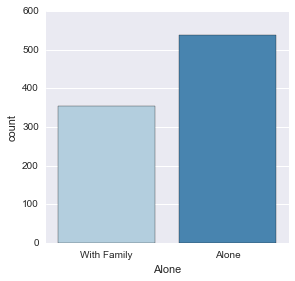

In [32]:
# Now let's get a simple visualization!
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

#### So there are a bit more people who were completely Alone than those who came up on board with some sort of family.
#### Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question:


# Q5: What factors helped someone survive the sinking?

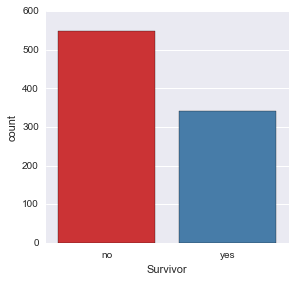

In [33]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

#### So quite a few more people died than those who survived. 
## Let's see which factors affect survival rate?


### Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

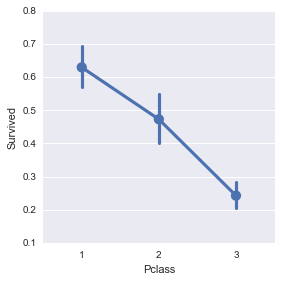

In [34]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanic_df)
# THis is not a count plot, so no need to set kind='count'
# instead, this is more of an x-y plot where x='Survivied' and y='Pclass'

## Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

#### (Check back to see that 3rd class has way more male than any of the other classes)

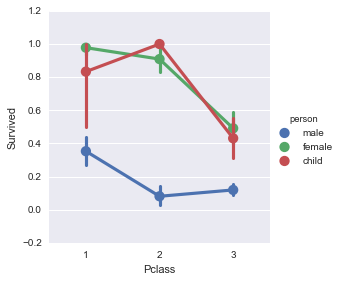

In [35]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

## From this data it looks like being a male OR being in 3rd class were both not favourable for survival. 

## Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

## But what about age? Did being younger or older have an effect on survival rate?

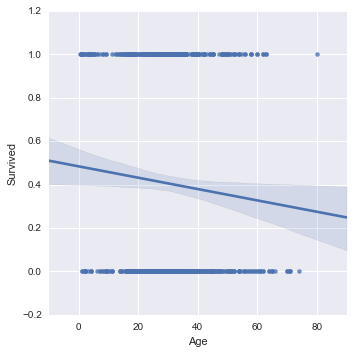

In [36]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)
# on the top, the 1.0 line is all the data points of people who survivied
# (Since their 'Survived' value will be 1) and their corresponding age
# and at the bottom are those whose 'Survived' col is 0 and their corresponding age

### Looks like there is a general trend that the older the passenger was, the less likely they survived. 

### Let's go ahead and use hue to take a look at the effect of class and age.

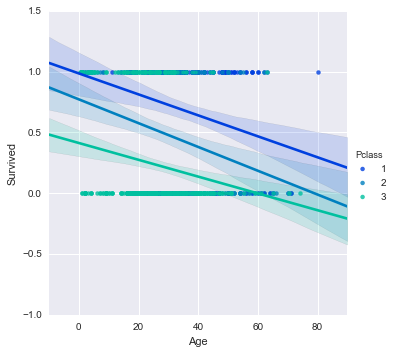

In [37]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')
# since we're plotting many plots here, let's use palette.

##### So now you can see the trends with classes: there are more deaths in 3rd classes for all ages.

#### We can also use the x_bin argument to clean up this figure (to have bins instead of having every data points) and grab the data and bin it by age with a std attached!

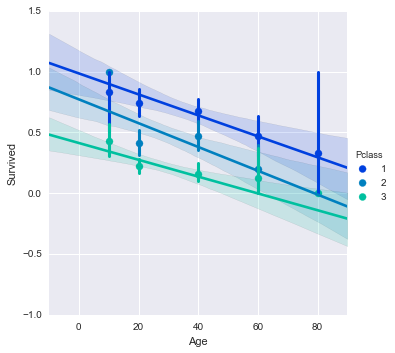

In [38]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',
           x_bins=generations)

#### Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

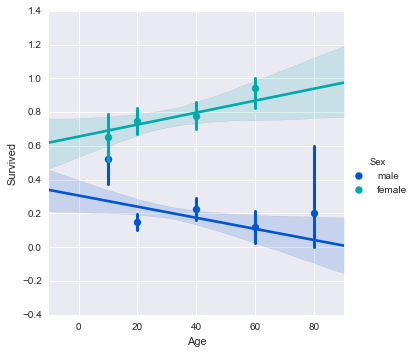

In [39]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',
           x_bins=generations)

# Look like being an older female will have better survival chance than being an older male.

## But still, the old males have a high std on it. So it might be interesting to look closer on that.

#### Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now we consider next questions:

# Q6: Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
Does being on an 'A' deck has a higher survival rate than being on an 'E' or 'F' decks? And how being a male affects that same outcome? So, if you are a male on a higher deck or a lower deck, does it really make a difference or not?

In [40]:
# Function to grab the first leter of cabin to figure out which floor
def decklevel(cabin):
    deck = cabin
    for level in deck:
        levels = level[0]
    return levels

# adding deck levels (levels) to titanic_df
titanic_df['decklevels'] = titanic_df[['Cabin']].dropna().apply(decklevel,axis=1)

# removing T entry
titanic_df = titanic_df[titanic_df.Cabin != 'T']

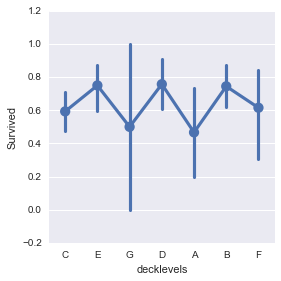

In [41]:
# create plot of decklevels and survivors
sns.factorplot('decklevels','Survived',data=titanic_df)

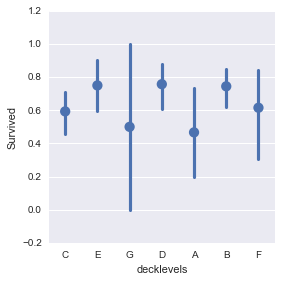

In [42]:
# create plot of decklevels and survivors
sns.factorplot('decklevels','Survived',data=titanic_df,join=False)

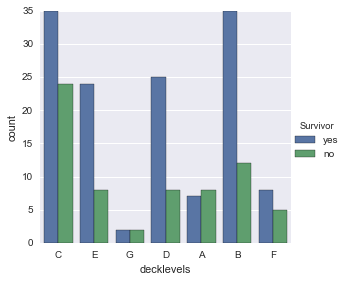

In [43]:
sns.factorplot('decklevels',data=titanic_df,hue='Survivor',kind='count',
               hue_order=['yes','no'])

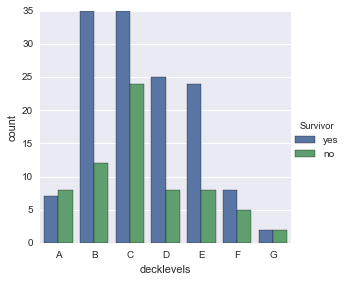

In [81]:
# just re-organize in order decks ABCDEFG
sns.factorplot('decklevels',data=titanic_df,hue='Survivor',kind='count',
               order=['A','B','C','D','E','F','G'],hue_order=['yes','no'])

## It seems that having been on deck level B, D or E chances would have been slightly higher to survive. These could be the decks where the lifeboat had been located.

## Answering this question is problematic due to the number of missing values. In the dataset cabin information exists for about 22 percent of the passengers; 204 passengers of the 891 passengers had cabin information. Moreover, the missing cabin information was predominant for second and third class passengers: 19% of first class passengers had missing information, 91% of second class, and 98% of third class.

## The Titanic cabin decks were arranged sequentially from A at the top to G at the bottom. First class passenger cabins were on decks A through E, second class passengers on decks D through F, and third class on decks D through G. However, the Boat Deck, on which the life boats could be accessed, was located above the A Deck. The decks closest to the Boat Deck would seem to be advantaged, and only the first class cabins were on these decks.

# Q7: Did having a family member increase the odds of surviving the crash?
So, does having a family will get people get on the boat, because there are people supporting you? Or is it better if you are alone and don't have to worry about your family?


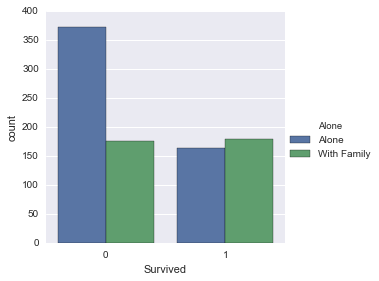

In [44]:
sns.factorplot('Survived',data=titanic_df,hue='Alone',kind='count',
               hue_order=['Alone','With Family'])

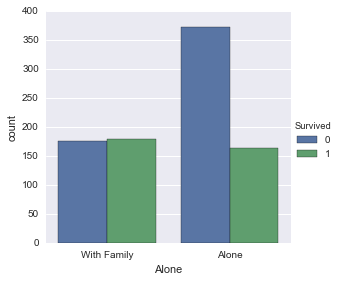

In [45]:
sns.factorplot('Alone',data=titanic_df,hue='Survived',kind='count')

#### OK, so look like if you are alone, high chance you do not survive. If you are with family, It doesn't matter.

C:\Users\Tho7\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(0, 10)

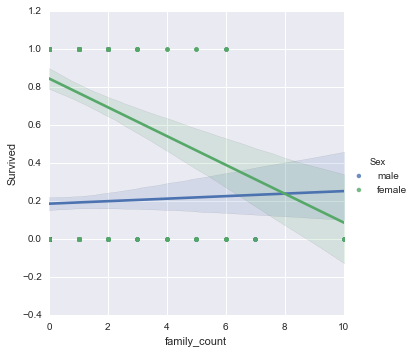

In [46]:
titanic_df['family_count']=titanic_df['SibSp'] + titanic_df['Parch']

sns.lmplot('family_count','Survived',data=titanic_df,hue='Sex')

plt.xlim(titanic_df['family_count'].min(),titanic_df['family_count'].max())

#### Look like: being a single female had biggest chance to survive. If you were a female, the bigger size of your family, the smaller you had chance to survive.

#### If you were a male, the bigger size of your family, the chance slighlty better .

# Conclusion: This is a very interesting dataset to analyze!